# Интерпретация. Практическая работа

## Цель практической работы

Научиться интерпретировать модели кластеризации.

## Что входит в практическую работу


1. Загрузить данные и провести разведочный анализ.
2. Предположить оптимальное количество кластеров.
3. Очистить и подготовить данные для использования в моделях машинного обучения.
4. Построить модель кластеризации с помощью библиотеки Scikit-learn и вычислить оптимальное количество кластеров.
5. Визуализировать результаты кластеризации.
6. Интерпретировать полученные результаты.
7. Подкрепить выводы интерпретации визуализациями.

## Что оценивается 

* Выполнены все этапы работы.
* Сделаны выводы по результатам разведочного анализа данных.
* Выполнена и обоснована подготовка данных.
* Выбор количества кластеров обоснован и подкреплён визуализацией. 
* Выбор гиперпараметров метода понижения размерности обоснован.
* Интерпретация кластеров подкреплена расчётами и визуализацией. 



# Задача

У вас имеется некоторый набор данных `marketing_campaign.csv` о покупателях супермаркета.

* ID — уникальный идентификатор клиента.
* Year_Birth — год рождения клиента.
* Dt_Customer — дата регистрации клиента на сайте.
* Recency — количество дней с момента последней покупки клиента.
* MntFruits — сумма, потраченная на фрукты за последние два года.
* MntMeatProducts — сумма, потраченная на мясо за последние два года.
* MntFishProducts — сумма, потраченная на рыбу за последние два года.
* MntSweetProducts — сумма, потраченная на сладости за последние два года.
* NumWebPurchases — количество покупок, совершённых через сайт.
* NumStorePurchases — количество покупок, совершённых непосредственно в магазинах.
* Response: 1, если клиент участвовал в последней рекламной кампании, 0 — в противном случае.

Решите задачу кластеризации покупателей, чтобы в дальнейшем планировать маркетинговые акции для каждой группы покупателей. Подготовьте результаты своей работы для демонстрации заказчику, не погружённому в машинное обучение.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

In [2]:
df = pd.read_csv("data/14.4 Marketing campaign.csv")
print(df.shape)
df.head()

(2240, 11)


,ID,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
0,5524,1957,04-09-2012,58,88,546,172,88,8,4,1
1,2174,1954,08-03-2014,38,1,6,2,1,1,2,0
2,4141,1965,21-08-2013,26,49,127,111,21,8,10,0
3,6182,1984,10-02-2014,26,4,20,10,3,2,4,0
4,5324,1981,19-01-2014,94,43,118,46,27,5,6,0


In [3]:
df.describe()

,ID,Year_Birth,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,49.109375,26.302232,166.950000,37.525446,27.062946,4.084821,5.790179,0.149107
std,3246.662198,11.984069,28.962453,39.773434,225.715373,54.628979,41.280498,2.778714,3.250958,0.356274
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,24.000000,1.000000,16.000000,3.000000,1.000000,2.000000,3.000000,0.000000
50%,5458.500000,1970.000000,49.000000,8.000000,67.000000,12.000000,8.000000,4.000000,5.000000,0.000000
75%,8427.750000,1977.000000,74.000000,33.000000,232.000000,50.000000,33.000000,6.000000,8.000000,0.000000
max,11191.000000,1996.000000,99.000000,199.000000,1725.000000,259.000000,263.000000,27.000000,13.000000,1.000000


In [4]:
df.isna().sum()

ID                   0
Year_Birth           0
Dt_Customer          0
Recency              0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
NumWebPurchases      0
NumStorePurchases    0
Response             0
dtype: int64

In [5]:
df.dtypes

ID                    int64
Year_Birth            int64
Dt_Customer          object
Recency               int64
MntFruits             int64
MntMeatProducts       int64
MntFishProducts       int64
MntSweetProducts      int64
NumWebPurchases       int64
NumStorePurchases     int64
Response              int64
dtype: object

In [6]:
# Вывод количества уникальных значений признаков и их частот для более детального анализа.
for column in ['ID', 'Year_Birth', 'Dt_Customer', 'Recency', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
               'MntSweetProducts', 'NumWebPurchases', 'NumStorePurchases', 'Response']:    
    column_name = df[column]
    print(f"Характеристика: {column} \nКоличество уникальных значений: {column_name.nunique()} \nСписок значений: \n{column_name.value_counts(dropna=False)} \n")

Характеристика: ID 
Количество уникальных значений: 2240 
Список значений: 
5524    1
6885    1
3478    1
7494    1
1763    1
       ..
5682    1
5564    1
6516    1
6255    1
9405    1
Name: ID, Length: 2240, dtype: int64 

Характеристика: Year_Birth 
Количество уникальных значений: 59 
Список значений: 
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64 

Характерист

## Создание новых признаков

В процессе исследования датасета были обнаружены строки с отсутствием одновременно как онлайн, так и оффлайн покупок, но при этом присутствуют цифры с ненулевыми покупками в других столбцах. Это нелогично. Удалим подобные строки, так как они не позволят провести качественный анализ и отрицательно повлияют на создание лругих признаков. 

In [7]:
df[(df['NumWebPurchases']==0) & (df['NumStorePurchases']==0)]

,ID,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
21,5376,1979,06-01-2013,42,1,1725,1,1,0,0,0
164,8475,1973,01-03-2014,98,2,1582,1,2,0,0,0
655,5555,1975,07-02-2014,81,1,1,1,1,0,0,0
981,3955,1965,22-06-2014,20,1,1,1,0,0,0,0
1042,10749,1991,18-09-2012,62,18,66,7,12,0,0,0
1245,6862,1971,18-05-2014,65,1,3,1,1,0,0,0
1524,11110,1973,13-04-2013,56,1,1,0,0,0,0,0
1653,4931,1977,29-04-2013,13,0,1725,2,1,0,0,0
1846,9931,1963,23-06-2014,29,0,1,1,1,0,0,0
2132,11181,1949,29-08-2013,85,1,2,1,1,0,0,0


In [8]:
df = df[~((df['NumWebPurchases']==0) & (df['NumStorePurchases']==0))]
df.head()

,ID,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
0,5524,1957,04-09-2012,58,88,546,172,88,8,4,1
1,2174,1954,08-03-2014,38,1,6,2,1,1,2,0
2,4141,1965,21-08-2013,26,49,127,111,21,8,10,0
3,6182,1984,10-02-2014,26,4,20,10,3,2,4,0
4,5324,1981,19-01-2014,94,43,118,46,27,5,6,0


##### Возраст

In [9]:
# Изменим столбец "год рождения" на более информативный столбец "возраст".
# Полагаем, что работа над датасетом производилась в 2014 году.
df['Year_Birth'] = 2014 - df['Year_Birth']
df = df.rename(columns={'Year_Birth': 'Age'})
df.head()

,ID,Age,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
0,5524,57,04-09-2012,58,88,546,172,88,8,4,1
1,2174,60,08-03-2014,38,1,6,2,1,1,2,0
2,4141,49,21-08-2013,26,49,127,111,21,8,10,0
3,6182,30,10-02-2014,26,4,20,10,3,2,4,0
4,5324,33,19-01-2014,94,43,118,46,27,5,6,0


In [10]:
# В признаке "возраст" видим выбросы.
df[df.Age >= 80]

,ID,Age,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
192,7829,114,26-09-2013,99,6,8,7,4,2,2,0
239,11004,121,17-05-2014,23,0,5,7,0,1,2,0
339,1150,115,26-09-2013,36,144,562,104,64,4,4,0


In [11]:
# Удаляем эти выбросы.
df = df[(df.Age < 80)]
df.shape

(2227, 11)

In [12]:
# Для лучшего визуального анализа разделим покупателей на 4 возрастные группы.
df['Age_interval'] =  df.apply(lambda x: "60+" if x.Age > 60 
                               else ("47-60" if 46 < x.Age <= 60 
                                     else ("33-46" if 33 <= x.Age <= 46 else "18-32" )), axis=1)

##### Months_ago_registered

In [13]:
df['Dt_Customer'].unique()

array(['04-09-2012', '08-03-2014', '21-08-2013', '10-02-2014',
       '19-01-2014', '09-09-2013', '13-11-2012', '08-05-2013',
       '06-06-2013', '13-03-2014', '15-11-2013', '10-10-2012',
       '24-11-2012', '24-12-2012', '31-08-2012', '28-03-2013',
       '03-11-2012', '08-08-2012', '23-12-2012', '11-01-2014',
       '18-03-2013', '02-01-2013', '27-05-2013', '20-02-2013',
       '31-05-2013', '22-11-2013', '22-05-2014', '11-05-2013',
       '29-10-2012', '29-08-2013', '31-12-2013', '02-09-2013',
       '11-02-2014', '01-02-2013', '29-04-2013', '12-03-2013',
       '05-11-2013', '02-10-2013', '28-06-2014', '09-11-2012',
       '24-05-2013', '01-01-2014', '08-11-2012', '12-05-2014',
       '11-08-2012', '07-06-2014', '12-06-2013', '19-11-2012',
       '02-04-2013', '28-04-2014', '17-06-2013', '03-03-2014',
       '04-07-2013', '07-09-2012', '18-02-2013', '11-06-2013',
       '06-12-2013', '21-05-2013', '11-05-2014', '19-03-2014',
       '27-09-2013', '08-04-2013', '11-09-2012', '14-09

In [14]:
# Создание признака "длительность регистрации на сайте в месяцах", более информативного, по сравнению начальным категориальным.
# Формула: (2014 - год регистрации)*12 + (7 - месяц регистрации)
df['Months_ago_registered'] = (2014 - df.Dt_Customer.apply(lambda x: x.split('-')[2]).astype(int))*12 + (7 - df.Dt_Customer.apply(lambda x: x.split('-')[1]).astype(int))

In [15]:
df['Months_ago_registered'].unique()

array([22,  4, 11,  5,  6, 10, 20, 14, 13,  8, 21, 19, 23, 16, 18, 17,  2,
        7, 15,  9,  1,  3, 12, 24])

#####  TotalNumPurchases, %_WebPurchases, TotalCostProducts, AvgBill

In [16]:
# Общее количество покупок = число покупок онлайн + число покупок оффлайн.
df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumStorePurchases']

# % покупок онлайн от количества всех покупок.
df['%_WebPurchases'] = df['NumWebPurchases'] / df['TotalNumPurchases'] * 100

# Общая стоимость покупок = стоимость фруктов + мясные изделия + рыба + сладости.
df['TotalCostProducts'] = df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts']

# Средний чек покупки = Общая стоимость покупок / Общее количество покупок.
df['AvgBill'] = df['TotalCostProducts'] / df['TotalNumPurchases'] 

In [17]:
df.head()

,ID,Age,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,Age_interval,Months_ago_registered,TotalNumPurchases,%_WebPurchases,TotalCostProducts,AvgBill
0,5524,57,04-09-2012,58,88,546,172,88,8,4,1,47-60,22,12,66.666667,894,74.500000
1,2174,60,08-03-2014,38,1,6,2,1,1,2,0,47-60,4,3,33.333333,10,3.333333
2,4141,49,21-08-2013,26,49,127,111,21,8,10,0,47-60,11,18,44.444444,308,17.111111
3,6182,30,10-02-2014,26,4,20,10,3,2,4,0,18-32,5,6,33.333333,37,6.166667
4,5324,33,19-01-2014,94,43,118,46,27,5,6,0,33-46,6,11,45.454545,234,21.272727


## Визуализация и анализ

In [18]:
df.columns

Index(['ID', 'Age', 'Dt_Customer', 'Recency', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'NumWebPurchases',
       'NumStorePurchases', 'Response', 'Age_interval',
       'Months_ago_registered', 'TotalNumPurchases', '%_WebPurchases',
       'TotalCostProducts', 'AvgBill'],
      dtype='object')

#### Распределения признаков

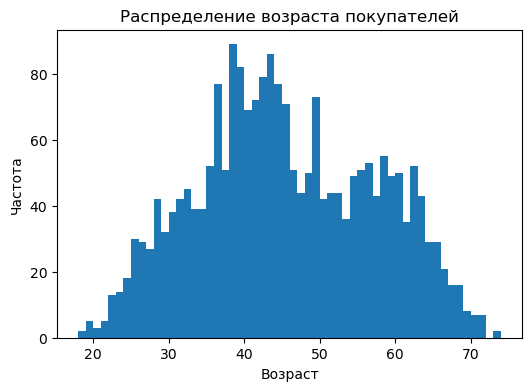

In [19]:
# Стандартное нормальное распределение
plt.figure(figsize=(6, 4))
plt.hist(df['Age'], bins=56)
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Распределение возраста покупателей');

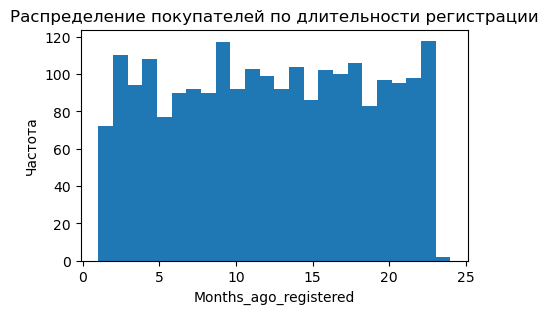

In [20]:
# Каждый месяц (целый) на сайте регистрировалось примерно одинаковое количество покупателей. Близко к равномерному.
plt.figure(figsize=(5, 3))
plt.hist(df['Months_ago_registered'], bins=24)
plt.xlabel('Months_ago_registered')
plt.ylabel('Частота')
plt.title('Распределение покупателей по длительности регистрации');

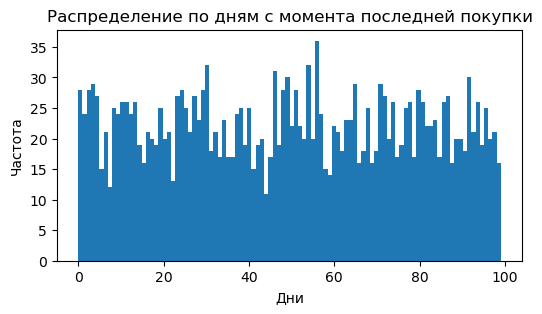

In [21]:
plt.figure(figsize=(6, 3))
plt.hist(df['Recency'], bins=100)
plt.xlabel('Дни')
plt.ylabel('Частота')
plt.title('Распределение по дням с момента последней покупки');

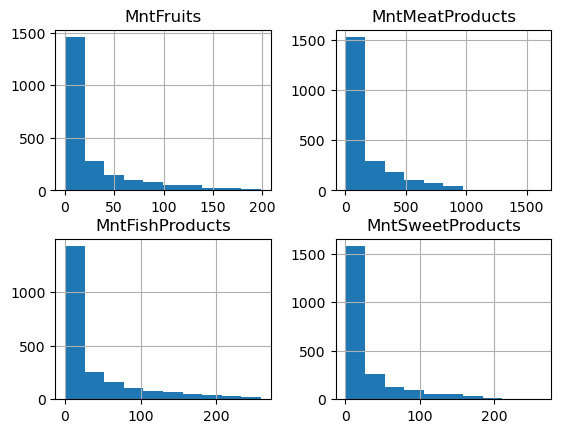

In [22]:
# В основном посетители тратили малые суммы в каждом из отделов.
df[['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].hist();

In [23]:
# Видим выбросы: покупатели с единственной покупкой потратили очень большую сумму на мясную продукцию.
df[df.MntMeatProducts>1000]

,ID,Age,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,Age_interval,Months_ago_registered,TotalNumPurchases,%_WebPurchases,TotalCostProducts,AvgBill
687,1501,32,04-08-2012,21,16,1622,17,3,0,1,0,18-32,23,1,0.0,1658,1658.0
2228,8720,36,12-08-2012,53,2,1607,12,4,0,1,0,33-46,23,1,0.0,1625,1625.0


In [24]:
# Удаляем эти выбросы.
df.drop([687,2228], inplace=True)

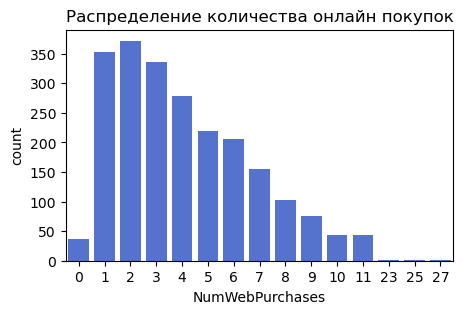

In [25]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df,x=df['NumWebPurchases'], color='royalblue')
plt.title('Распределение количества онлайн покупок');

In [26]:
# Посмотрим на строки с количеством онлайн покупок более 11, которые выделяются из общего ряда.
df[df.NumWebPurchases>11]

,ID,Age,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,Age_interval,Months_ago_registered,TotalNumPurchases,%_WebPurchases,TotalCostProducts,AvgBill
27,5255,28,20-02-2013,19,1,3,3,263,27,0,0,18-32,17,27,100.000000,270,10.000000
1806,6237,48,07-12-2013,92,4,33,5,2,23,1,0,47-60,7,24,95.833333,44,1.833333
1898,4619,69,28-05-2014,9,2,3,1,262,27,0,0,60+,2,27,100.000000,268,9.925926
1975,10311,45,05-10-2013,0,4,12,2,4,25,0,0,33-46,9,25,100.000000,22,0.880000


In [27]:
# Принимаем решение удалить их.
df.drop([27,1806,1898,1975], inplace=True)

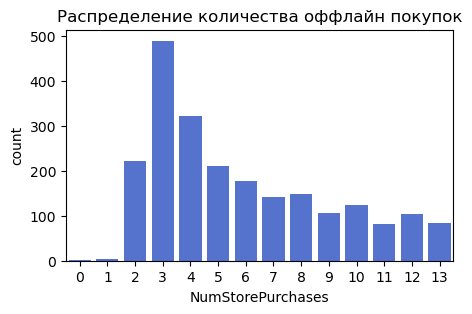

In [28]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df,x=df['NumStorePurchases'], color='royalblue')
plt.title('Распределение количества оффлайн покупок');

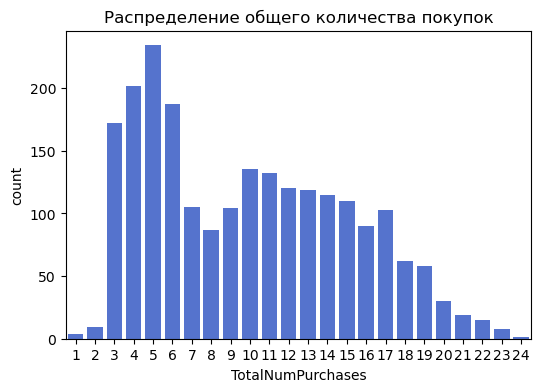

In [29]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df,x=df['TotalNumPurchases'], color='royalblue')
plt.title('Распределение общего количества покупок');

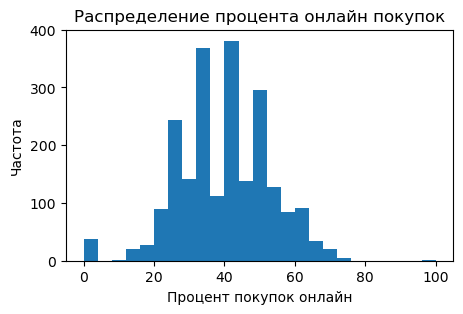

In [30]:
plt.figure(figsize=(5, 3))
plt.hist(df['%_WebPurchases'], bins=25)
plt.xlabel('Процент покупок онлайн')
plt.ylabel('Частота')
plt.title('Распределение процента онлайн покупок');

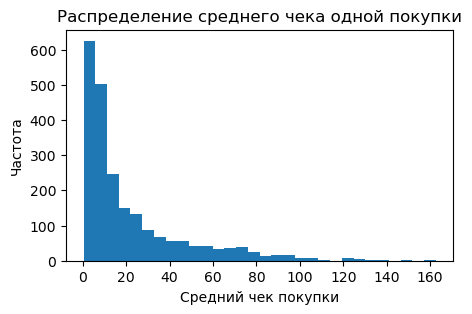

In [31]:
plt.figure(figsize=(5, 3))
plt.hist(df['AvgBill'], bins=30)
plt.xlabel('Средний чек покупки')
plt.ylabel('Частота')
plt.title('Распределение среднего чека одной покупки');

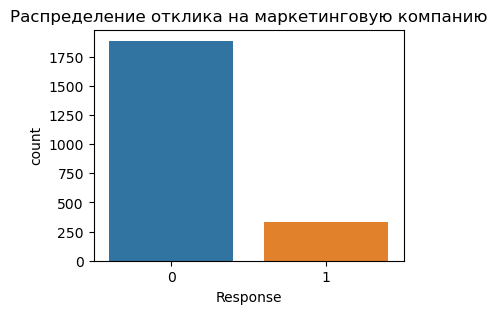

In [32]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df,x=df['Response'])
plt.title('Распределение отклика на маркетинговую компанию');

#### Анализ в разрезе возраста покупателей

In [33]:
# Группировка по возрастным группам средних значений признаков.
stats1 = df.groupby(['Age_interval'], as_index=False)[['TotalNumPurchases', '%_WebPurchases', 'TotalCostProducts', 'AvgBill', 
                                                       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                                                       'MntSweetProducts']].mean()
stats1

,Age_interval,TotalNumPurchases,%_WebPurchases,TotalCostProducts,AvgBill,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
0,18-32,8.641399,37.252874,288.737609,25.303072,29.364431,190.463557,39.760933,29.148688
1,33-46,9.438841,40.220668,220.446352,18.545272,23.778970,138.040773,33.997854,24.628755
2,47-60,10.689150,39.991069,268.319648,21.976124,27.815249,172.636364,39.472141,28.395894
3,60+,11.170455,39.583184,303.443182,25.155289,28.439394,201.837121,44.087121,29.079545


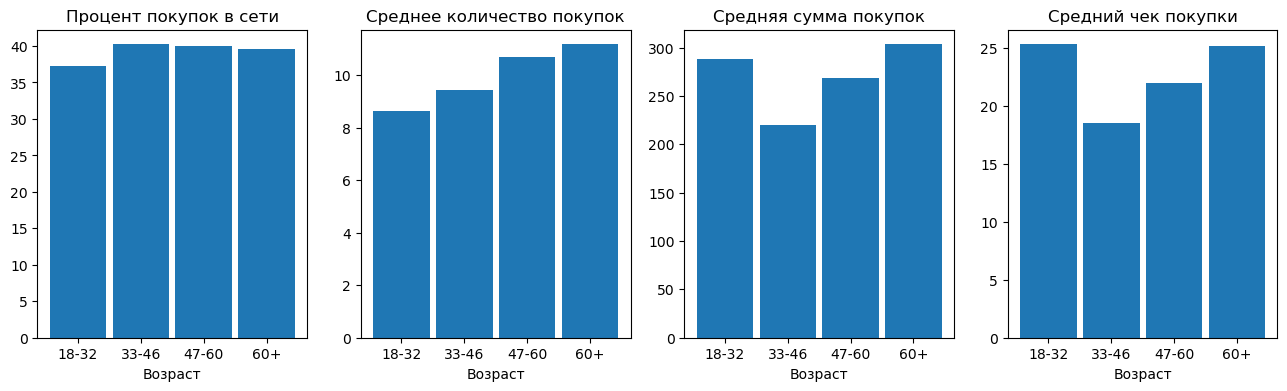

In [34]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(16, 4), sharex=True)

ax1.bar(stats1['Age_interval'], stats1['%_WebPurchases'], width=0.9)
ax1.set_xlabel('Возраст')
ax1.set_title('Процент покупок в сети')

ax2.bar(stats1['Age_interval'], stats1['TotalNumPurchases'], width=0.9)
ax2.set_xlabel('Возраст')
ax2.set_title('Среднее количество покупок')

ax3.bar(stats1['Age_interval'], stats1['TotalCostProducts'], width=0.9)
ax3.set_xlabel('Возраст')
ax3.set_title('Средняя сумма покупок')

ax4.bar(stats1['Age_interval'], stats1['AvgBill'], width=0.9)
ax4.set_xlabel('Возраст')
ax4.set_title('Средний чек покупки');

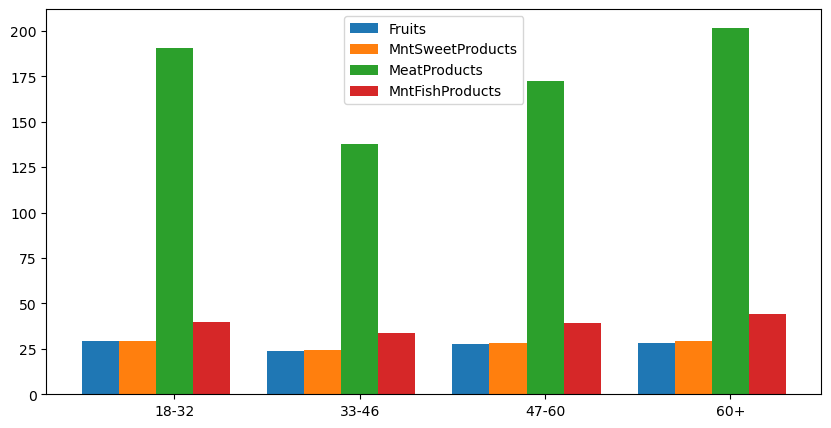

In [35]:
y = (stats1.Age_interval.unique())
x = np.arange(len(y))
width = 0.2

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x - width/0.5, stats1.MntFruits, width, label='Fruits')
ax.bar(x - width, stats1.MntSweetProducts, width, label='MntSweetProducts')
ax.bar(x, stats1.MntMeatProducts, width, label='MeatProducts')
ax.bar(x + width, stats1.MntFishProducts, width, label='MntFishProducts')

ax.set_xticks(x)
ax.set_xticklabels(y)
ax.legend();

In [36]:
stats2 = df.groupby(['Age_interval'], as_index=False)[['Response']].count()
stats2['Response=1'] = stats2.Age_interval.apply(lambda x: len(df[(df['Age_interval'] == x) & (df['Response'] == 1)]))
stats2['Response_%'] = round(((stats2['Response=1'] / stats2['Response'])*100), 1)
stats2

,Age_interval,Response,Response=1,Response_%
0,18-32,343,71,20.7
1,33-46,932,131,14.1
2,47-60,682,89,13.0
3,60+,264,43,16.3


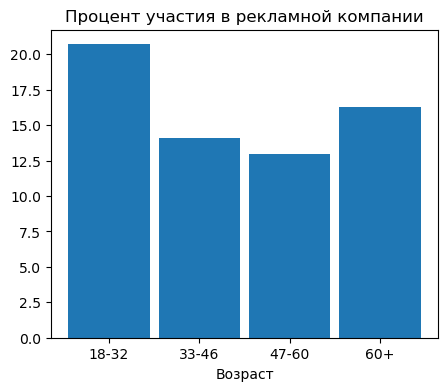

In [37]:
plt.figure(figsize=(5,4))
plt.bar(stats2['Age_interval'], stats2['Response_%'], width=0.9)
plt.xlabel('Возраст')
plt.title('Процент участия в рекламной компании');

**Выводы:**
1. Среднее количество совершенных покупок возрастает от самой младшей группы до самой возрастной. Но средний чек покупки и общие траты как младшей, так и старшей групп одинаково высокие.
2. Также у вышеуказанных групп одинаково высокие траты на мясную продукцию. Количество трат на другие категории продуктов и их соотношение у всех возрастных примерно одинаковые.
3. У какой-либо группы нет выраженных предпочтений к онлайн/оффлайн покупкам.
4. Молодежь имеет существенно бОльший процент отклика на маркетинговое предложение.

#### Анализ в разрезе длительности с момента регистрации

In [38]:
# Группировка по длительности с момента регистрации на сайте.
stats3 = df.groupby(['Months_ago_registered'], as_index=False)[['TotalNumPurchases', '%_WebPurchases', 'TotalCostProducts',
                                                                'AvgBill', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                                                                'MntSweetProducts']].mean()
stats3.head()

,Months_ago_registered,TotalNumPurchases,%_WebPurchases,TotalCostProducts,AvgBill,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
0,1,8.416667,37.167602,209.402778,19.865734,24.527778,130.236111,35.125000,19.513889
1,2,8.761468,38.592335,236.596330,21.608131,24.174312,152.834862,36.724771,22.862385
2,3,8.510638,37.125933,228.882979,20.132256,22.957447,145.425532,35.968085,24.531915
3,4,8.175926,37.805647,156.398148,14.537703,16.185185,103.351852,21.861111,15.000000
4,5,8.636364,35.523495,259.272727,21.955260,25.571429,171.038961,33.285714,29.376623


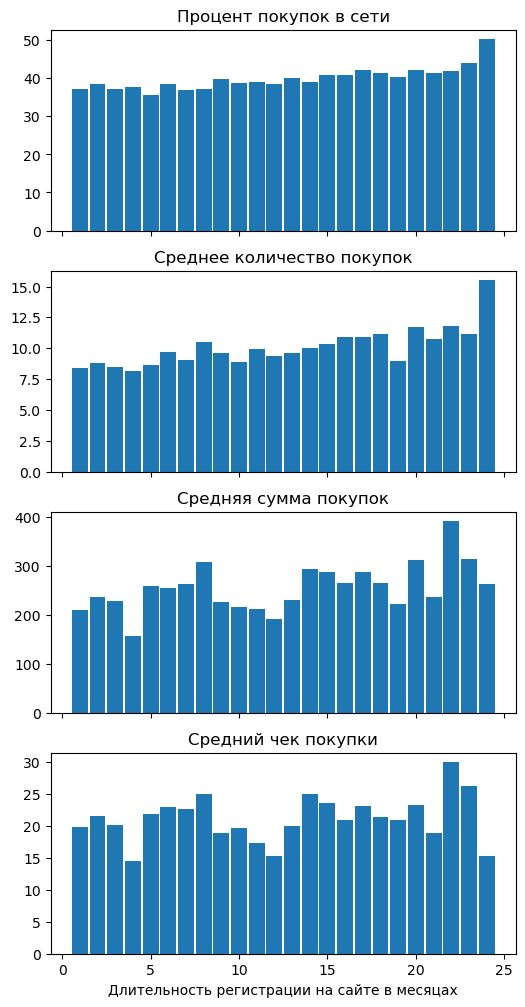

In [39]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(6, 12), sharex=True)

ax1.bar(stats3['Months_ago_registered'], stats3['%_WebPurchases'], width=0.9)
ax1.set_title('Процент покупок в сети')

ax2.bar(stats3['Months_ago_registered'], stats3['TotalNumPurchases'], width=0.9)
ax2.set_title('Среднее количество покупок')

ax3.bar(stats3['Months_ago_registered'], stats3['TotalCostProducts'], width=0.9)
ax3.set_title('Средняя сумма покупок')

ax4.bar(stats3['Months_ago_registered'], stats3['AvgBill'], width=0.9)
ax4.set_xlabel('Длительность регистрации на сайте в месяцах')
ax4.set_title('Средний чек покупки');

In [40]:
stats4 = df.groupby(['Months_ago_registered'], as_index=False)[['Response']].count()
stats4['Response=1'] = stats4.Months_ago_registered.apply(lambda x: len(df[(df['Months_ago_registered'] == x) & (df['Response'] == 1)]))
stats4['Response_%'] = round(((stats4['Response=1'] / stats4['Response'])*100), 1)
stats4.head()

,Months_ago_registered,Response,Response=1,Response_%
0,1,72,5,6.9
1,2,109,7,6.4
2,3,94,7,7.4
3,4,108,9,8.3
4,5,77,12,15.6


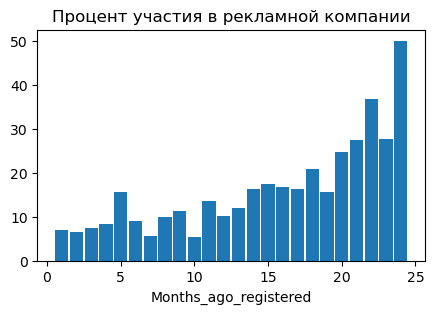

In [41]:
plt.figure(figsize=(5,3))
plt.bar(stats4['Months_ago_registered'], stats4['Response_%'], width=0.9)
plt.xlabel('Months_ago_registered')
plt.title('Процент участия в рекламной компании');

Наблюдается такая зависимость: чем дольше покупатель зарегистрирован на сайте, тем выше среднее количество покупок, процент онлайн покупок и процент отклика на маркентинговую компанию.

#### Анализ в разрезе отклика на маркетинговую компанию

In [42]:
stats5 = df.groupby(['Response'], as_index=False)[['Age','Months_ago_registered','TotalNumPurchases', '%_WebPurchases',
                                                   'TotalCostProducts', 'AvgBill', 'MntFruits', 'MntMeatProducts',
                                                   'MntFishProducts', 'MntSweetProducts']].mean()
stats5

,Response,Age,Months_ago_registered,TotalNumPurchases,%_WebPurchases,TotalCostProducts,AvgBill,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
0,0,45.210387,11.667727,9.682035,38.588803,225.878643,18.954109,24.351881,141.331214,35.240064,24.955485
1,1,44.583832,15.278443,11.167665,45.419755,423.242515,35.405561,38.203593,294.353293,52.050898,38.634731


Отчетливо видно, что покупателей, которые откликнулись на рекламную компанию, можно считать самыми лояльными: они зарегистрированы давно, совершили больше покупок, имеют значительно бОльший средний чек.

# Задание 2

Метод k-средних требует явно задать количество кластеров, на которые будут разбиваться данные. Данных может быть так много, что построение одной модели будет занимать несколько часов, поэтому важно заранее примерно представлять количество кластеров до запуска обучения модели.

На основе проведённого разведочного анализа данных предположите, какое количество кластеров будет оптимальным, аргументируйте своё предположение.

#### Напишите ваш ответ ниже


Одно разделение точно проходит по признаку "Response" на значения 0 и 1. Далее объекты с признаком "Response"=0 могут быть разделены по еще одному признаку: приверженцев онлайн или оффлайн покупок, по возрастным группам, по уровню трат в определенных отделах либо по размеру среднего чека. После деления по одному из указанных критериев неисключено и более глубокое деление по следующему по значимости критерию. Исходя из не самого большого размера выборки и количества признаков, нецелесообразно разделять более чем на восемь кластеров.

# Задание 3

Выполните очистку и подготовку данных для дальнейшего использования при построении моделей машинного обучения. Аргументируйте выбранные шаги подготовки данных. 

In [43]:
df.columns

Index(['ID', 'Age', 'Dt_Customer', 'Recency', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'NumWebPurchases',
       'NumStorePurchases', 'Response', 'Age_interval',
       'Months_ago_registered', 'TotalNumPurchases', '%_WebPurchases',
       'TotalCostProducts', 'AvgBill'],
      dtype='object')

In [44]:
# Удаляем колонки, которые не будем использовать в алгоритме кластеризации.
df = df.drop(['ID', 'Dt_Customer', 'Age_interval', 'TotalNumPurchases', '%_WebPurchases', 'TotalCostProducts'], axis=1)

In [45]:
df.columns

Index(['Age', 'Recency', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'NumWebPurchases', 'NumStorePurchases', 'Response',
       'Months_ago_registered', 'AvgBill'],
      dtype='object')

In [46]:
# так как алгоритм кластеризации является метрическим, для получения лучших результатов приведем признаки к единому масштабу.
scaler = StandardScaler()

In [47]:
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_scaled.head()

,Age,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,Months_ago_registered,AvgBill
0,1.015964,0.306798,1.546866,1.776321,2.451900,1.495577,1.500620,-0.568640,2.376910,1.476868,2.162641
1,1.272438,-0.384416,-0.639071,-0.736966,-0.653346,-0.637900,-1.172708,-1.188492,-0.420714,-1.238716,-0.737350
2,0.332034,-0.799145,0.566963,-0.173804,1.337664,-0.147445,1.500620,1.290917,-0.420714,-0.182656,-0.175915
3,-1.292300,-0.799145,-0.563694,-0.671807,-0.507217,-0.588854,-0.790804,-0.568640,-0.420714,-1.087850,-0.621893
4,-1.035826,1.550984,0.416209,-0.215692,0.150365,-0.000309,0.354908,0.051212,-0.420714,-0.936985,-0.006332


# Задание 4

Постройте модель кластеризации с помощью метода k-средних. Определите оптимальное количество кластеров с помощью метода локтя и метрики silhouette score. 

Помните, что аналитический способ определения количества кластеров не является единственно верным. Если ваше понимание предметной области и результаты анализа данных расходятся с результатами метода локтя, вы можете выбрать и обосновать количество кластеров, исходя из своего опыта.

In [48]:
n_clusters = list(range(2, 12))

inertia = []
silhouette = []

for k in n_clusters:
    km = KMeans(n_clusters=k, random_state=73).fit(df_scaled)
    inertia.append(km.inertia_)
    
    score = silhouette_score(df_scaled, km.labels_)
    silhouette.append(score)

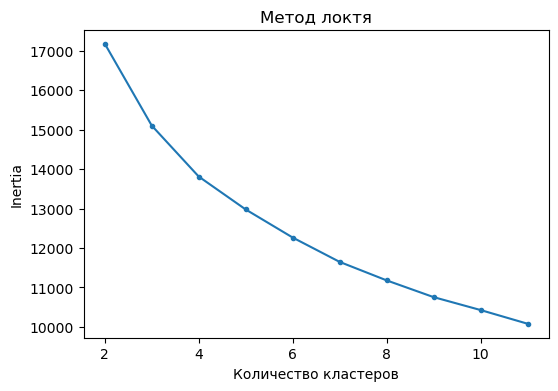

In [49]:
plt.figure(figsize=(6, 4))
plt.plot(n_clusters, inertia, marker='.')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.title('Метод локтя');

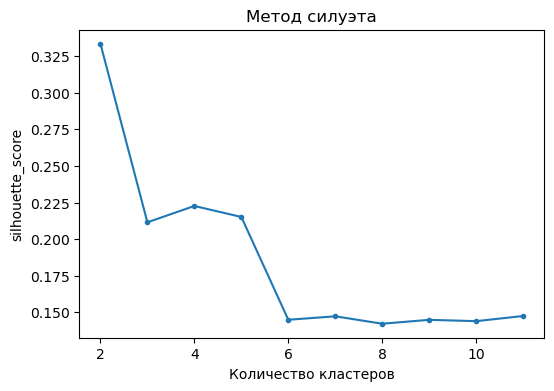

In [50]:
plt.figure(figsize=(6, 4))
plt.plot(n_clusters, silhouette, marker='.')
plt.xlabel('Количество кластеров')
plt.ylabel('silhouette_score')
plt.title('Метод силуэта');

**Вывод**

По методу локтя невозможно увидеть "точку излома". Метод силуэта математически показывает, что лучше всего разделение произойдет по двум кластерам. Но в реальном кейсе это будет недостаточно информативно. Для бизнесса будет лучшим провеизвести разделение покупателей на 4-5 сегментов с той целью, чтобы лучше узнать своих покупателей, постараться найти максимально лучший подход к каждой группе и тем самым попытаться увеличить свой прибыль.

# Задание 5

Визуализируйте результаты кластеризации на двумерном графике с помощью метода t-SNE. Обоснуйте выбранные значения его гиперпараметров.

In [51]:
km = KMeans(n_clusters=4).fit(df_scaled)
labels = km.labels_

In [52]:
tsne = TSNE(n_components=2, perplexity=60, random_state=73, n_jobs=-1)
df_emb = tsne.fit_transform(df_scaled)
data_tsne = pd.DataFrame(df_emb)
data_tsne

,0,1
0,42.674099,16.641413
1,-37.940094,1.956042
2,11.421576,6.407394
3,-49.046986,-7.279308
4,0.437832,-18.427744
...,...,...
2216,19.937677,2.495811
2217,0.501099,-9.222419
2218,11.253930,-10.690031
2219,8.155633,9.929895


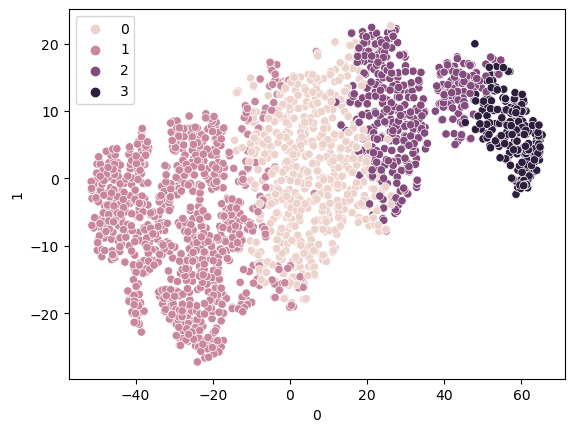

In [53]:
sns.scatterplot(x=data_tsne[0], y=data_tsne[1], hue=labels);

# Задание 6

Постройте профили кластеров и опишите их.

In [54]:
# Создание столбца с метками кластеров для соответствующих объектов.
df['Label'] = labels
df.head()

,Age,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,Months_ago_registered,AvgBill,Label
0,57,58,88,546,172,88,8,4,1,22,74.500000,2
1,60,38,1,6,2,1,1,2,0,4,3.333333,1
2,49,26,49,127,111,21,8,10,0,11,17.111111,0
3,30,26,4,20,10,3,2,4,0,5,6.166667,1
4,33,94,43,118,46,27,5,6,0,6,21.272727,0


In [55]:
# Подсчет количества значений каждого из кластеров.
df.Label.value_counts()

1    966
0    604
2    428
3    223
Name: Label, dtype: int64

In [56]:
# Доля вхождений.
df.Label.value_counts(normalize=True)

1    0.434939
0    0.271950
2    0.192706
3    0.100405
Name: Label, dtype: float64

In [57]:
# Координаты центроидов кластеров.
km.cluster_centers_

array([[ 0.35255765,  0.06699045, -0.00352356, -0.01470419, -0.03498833,
        -0.01374793,  0.79814397,  0.7613744 , -0.42071431,  0.1547942 ,
        -0.15442107],
       [-0.20755212,  0.06322757, -0.55178118, -0.65292009, -0.57024058,
        -0.54765324, -0.75640935, -0.77525728, -0.42071431, -0.24778092,
        -0.60341837],
       [-0.00274014,  0.07084877,  1.37239482,  1.56350976,  1.46450324,
         1.35187825,  0.41290711,  0.77316663,  0.30483776,  0.05457027,
         1.66990061],
       [-0.0505681 , -0.59131543, -0.23424277, -0.13264592, -0.24583873,
        -0.18505432,  0.32236876, -0.18783371,  2.37690988,  0.54934793,
        -0.17284747]])

In [58]:
# Преобразование, обратное стандартизации, над центроидами для лучшей интерпретируемости координат.
inverse = scaler.inverse_transform(km.cluster_centers_)
inverse

array([[ 4.92400662e+01,  5.10612583e+01,  2.62947020e+01,
         1.61183775e+02,  3.58526490e+01,  2.64519868e+01,
         6.16059603e+00,  8.29139073e+00, -1.94289029e-16,
         1.32367550e+01,  1.76385816e+01],
       [ 4.26884058e+01,  5.09523810e+01,  4.47412008e+00,
         2.40579710e+01,  6.54968944e+00,  4.68012422e+00,
         2.09006211e+00,  3.33333333e+00, -2.77555756e-16,
         1.05683230e+01,  6.62004831e+00],
       [ 4.50841121e+01,  5.11728972e+01,  8.10560748e+01,
         5.00275701e+02,  1.17943925e+02,  8.21401869e+01,
         5.15186916e+00,  8.32943925e+00,  2.59345794e-01,
         1.25724299e+01,  6.24080026e+01],
       [ 4.45246637e+01,  3.20134529e+01,  1.71121076e+01,
         1.35843049e+02,  2.43094170e+01,  1.94663677e+01,
         4.91479821e+00,  5.22869955e+00,  1.00000000e+00,
         1.58520179e+01,  1.71863920e+01]])

In [59]:
# Датафрейм из центроид с соответствующими названиями признаков для их координат.
df_centroids = pd.DataFrame(inverse, columns = df_scaled.columns)
df_centroids.head()

,Age,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,Months_ago_registered,AvgBill
0,49.240066,51.061258,26.294702,161.183775,35.852649,26.451987,6.160596,8.291391,-1.942890e-16,13.236755,17.638582
1,42.688406,50.952381,4.474120,24.057971,6.549689,4.680124,2.090062,3.333333,-2.775558e-16,10.568323,6.620048
2,45.084112,51.172897,81.056075,500.275701,117.943925,82.140187,5.151869,8.329439,2.593458e-01,12.572430,62.408003
3,44.524664,32.013453,17.112108,135.843049,24.309417,19.466368,4.914798,5.228700,1.000000e+00,15.852018,17.186392


In [60]:
# Статистики обработанного начального датасета.
df.describe()

,Age,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,Months_ago_registered,AvgBill,Label
count,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000,2221.000000
mean,45.116164,49.122918,26.434939,164.343089,37.768122,27.012607,4.070689,5.834759,0.150383,12.210716,21.428123,1.121567
std,11.699735,28.941098,39.808833,214.906406,54.758403,40.787693,2.619049,3.227302,0.357527,6.629900,24.545837,0.922974
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.333333,0.000000
25%,37.000000,24.000000,2.000000,16.000000,3.000000,1.000000,2.000000,3.000000,0.000000,7.000000,5.200000,0.000000
50%,44.000000,49.000000,8.000000,68.000000,12.000000,8.000000,4.000000,5.000000,0.000000,12.000000,10.923077,1.000000
75%,55.000000,74.000000,33.000000,231.000000,50.000000,34.000000,6.000000,8.000000,0.000000,18.000000,28.000000,2.000000
max,74.000000,99.000000,199.000000,984.000000,259.000000,198.000000,11.000000,13.000000,1.000000,24.000000,162.571429,3.000000


In [61]:
# В кластере "0" все объекты с откликом на маркетинговую компанию.
len(df[(df.Response==1) & (df.Label==0)])

0

**Профили кластеров:**

**Кластер 0** (10% покупателей). Абсолютно все откликнулись на маркетинговую компанию. Дольше всех зарегистрированы на сайте. Последнюю покупку совершали не так давно, относительно других кластеров. Сумма покупок по отделам и средний чек - немного ниже среднего.

**Кластер 1** (44%). Самые "молодые" по длительности регистрации на сайте. Сумма покупок по отделам, средний чек, количество покупок как онлайн, так и оффлайн, значительно меньше среднего.

**Кластер 2** (19%). Самые лояльные покупатели. Сумма покупок по отделам, средний чек, значительно выше среднего. Количество покупок как оффлайн, так и онлайн, большое.

**Кластер 3** (27%). Средний возраст покупателя самый высокий. Лидеры по количеству покупок. Но общие траты по отделам, средний чек соответствуют средним показателям по всей выборке.

# Задание 7

Визуализируйте профили кластеров. Подготовьте краткое резюме результатов вашего исследования для заказчика.

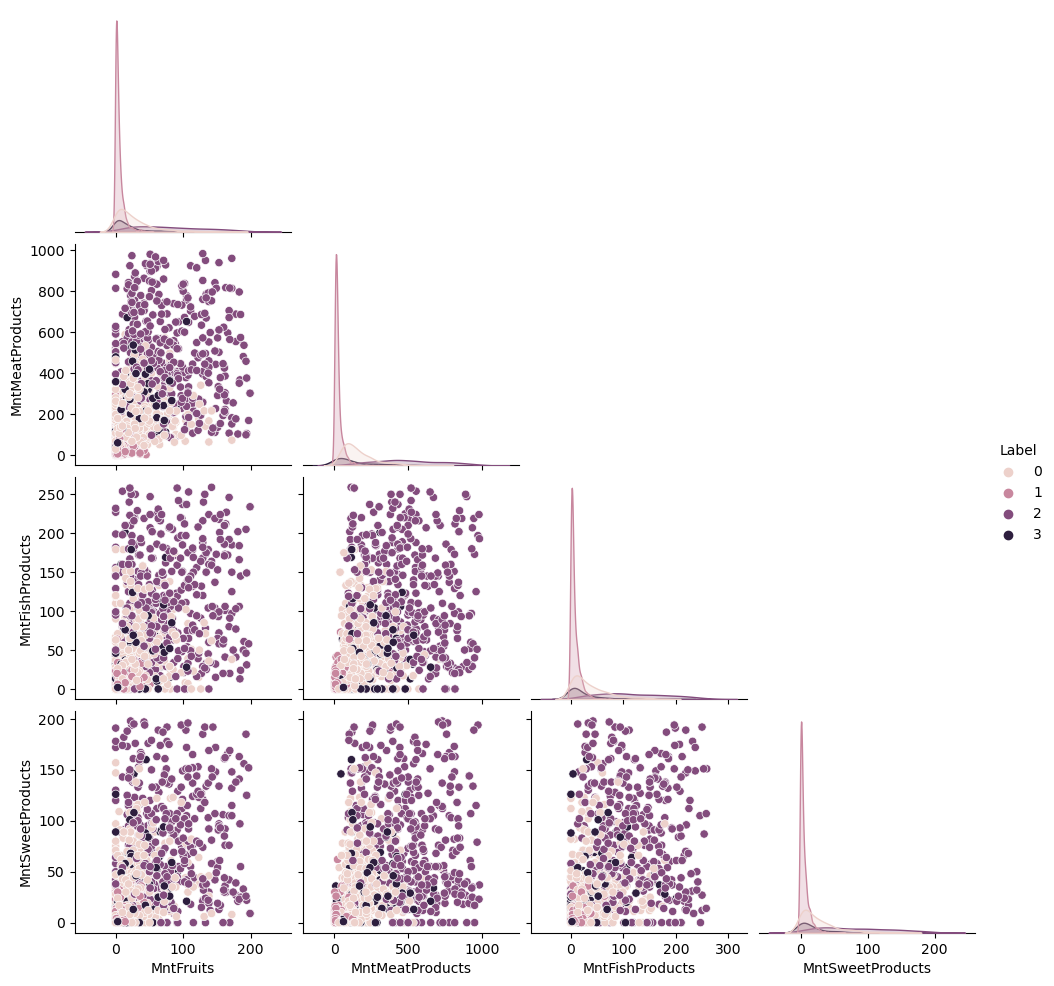

In [62]:
sns.pairplot(df, 
             x_vars=['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts'],
             y_vars=['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts'],
             hue='Label', corner=True);

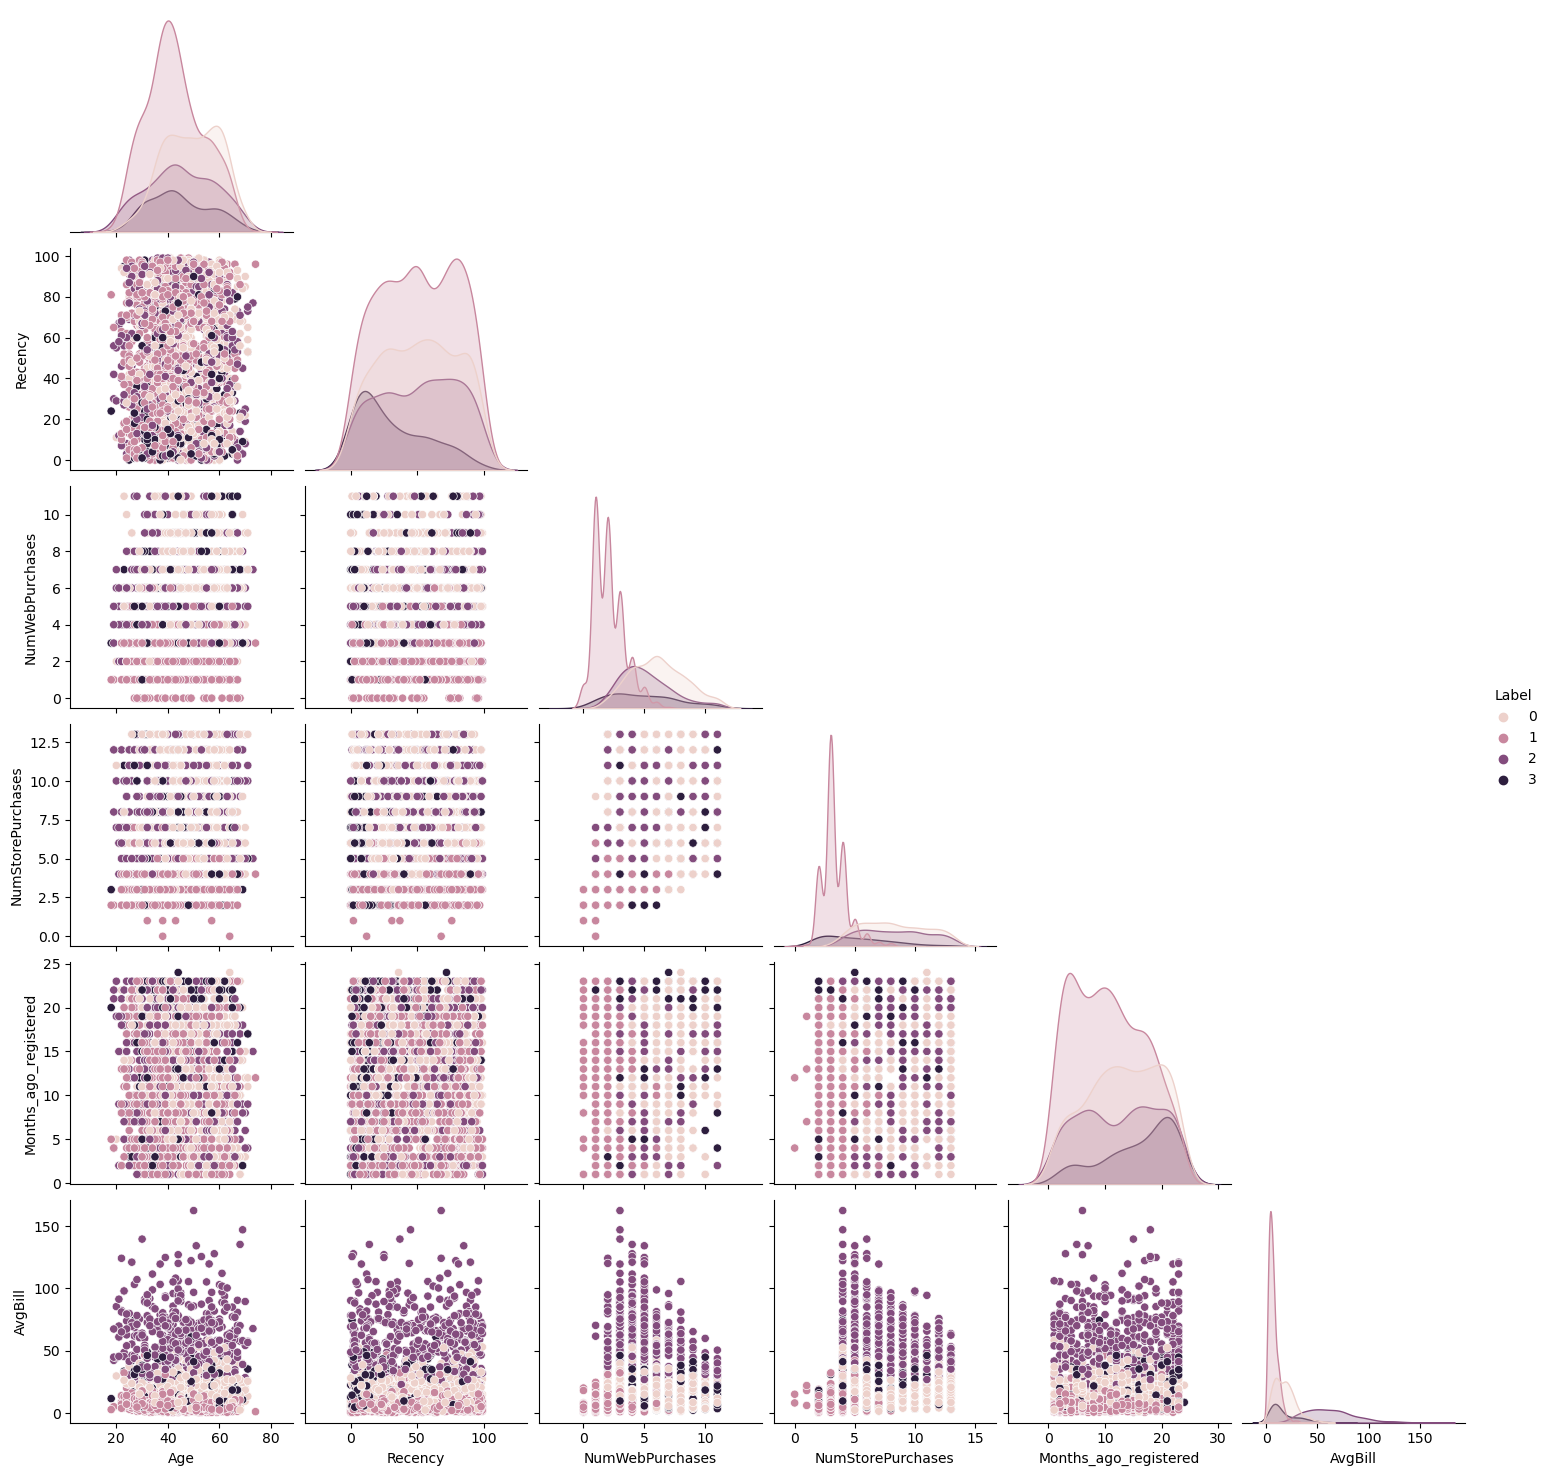

In [63]:
sns.pairplot(df, 
             x_vars=['Age', 'Recency', 'NumWebPurchases', 'NumStorePurchases', 'Months_ago_registered', 'AvgBill'],
             y_vars=['Age', 'Recency', 'NumWebPurchases', 'NumStorePurchases', 'Months_ago_registered', 'AvgBill'],
             hue='Label', corner=True);

**Предложения**

Кластер "2" состоит из самых лояльных покупателей, приносящих стабильно высокую прибыль. Нельзя допустить их оттока, поэтому необходимо недопустить снижения стандартов обслуживания, качества продуктов. Возможно "премировние" подарками, что позволит еще больше закрепить их лояльность.

Кластер "0" состоит из откликнувшихся на рекламную компанию. Нужно тщательно проанализировать, что объединяет людей из этой группы, чтобы в будущем новые подкорректированные рекламные компании охватили более широкую массу. Также стоит найти коренные различия между данной группой и другими, чтобы лучше понять последних.

Можно провести акции или скидки для покупателей, которые обычно тратят меньше (кластер "1"), для стимулирования покупок. Осуществить "рассылку-напоминание".

Покупатели кластера "3" часто делают покупки, но средний чек оставляет желать лучшего. Возможно, есть некоторая  неудовлетворенность ассортиментом с их стороны. Проанализировав детально их покупки, стоит поработать над шириной и глубиной ассортимета.